In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


In [3]:
blood_transfusion['Class'].value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
# to_predict = 'donated'
donated = DummyClassifier(strategy='most_frequent', random_state=0)
cv_results = cross_validate(donated, data, target, cv=10)
cv_results['test_score'].mean()

0.762054054054054

In [5]:
donated = DummyClassifier(strategy='most_frequent', random_state=0)
cv_results = cross_validate(donated, data, target, cv=10, scoring="balanced_accuracy")
cv_results['test_score'].mean()

0.5

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))
cv_results = cross_validate(model, data, target, cv=10, return_train_score=True)
cv_results

{'fit_time': array([0.01198983, 0.0179708 , 0.01835084, 0.01399016, 0.        ,
        0.01896381, 0.        , 0.00599909, 0.00499701, 0.02663875]),
 'score_time': array([0.01192451, 0.02263474, 0.00824761, 0.01874065, 0.03179407,
        0.00600362, 0.        , 0.00899529, 0.0142138 , 0.02998781]),
 'test_score': array([0.34666667, 0.57333333, 0.48      , 0.50666667, 0.6       ,
        0.66666667, 0.62666667, 0.64      , 0.60810811, 0.75675676]),
 'train_score': array([0.92867756, 0.93610698, 0.92719168, 0.93759287, 0.93164933,
        0.93313522, 0.91827637, 0.91084695, 0.93768546, 0.90356083])}

In [7]:
print(f"Mean train score: {cv_results['train_score'].mean():.3f} and Mean test score: {cv_results['test_score'].mean():.3f}")

Mean train score: 0.926 and Mean test score: 0.580


In [8]:
from sklearn.model_selection import validation_curve

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(
    model, data, target, param_name="kneighborsclassifier__n_neighbors", param_range=param_range,
    cv=5, scoring="balanced_accuracy", n_jobs=2)
# train_errors, test_errors = -train_scores, -test_scores

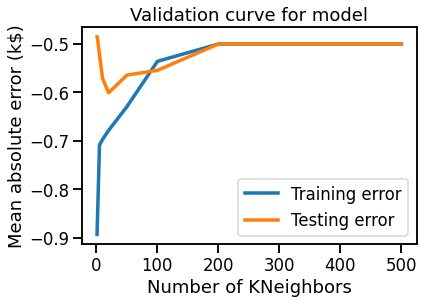

In [9]:
train_errors, test_errors = -train_scores, -test_scores
import matplotlib.pyplot as plt
plt.plot(param_range, train_errors.mean(axis=1), label="Training error")
plt.plot(param_range, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Number of KNeighbors")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for model")